In [1]:
%matplotlib inline
import zipfile
import os
from pathlib import Path
from tqdm import tqdm
import polars as pl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [2]:
from pathlib import Path
import polars as pl
from tqdm import tqdm

def count_rows_with_area(folder_path, column="area_231142", value=1):
    """Count how many rows in each parquet file have column == value.

    Args:
        folder_path (str): Path to the folder containing parquet files.
        column (str): Column name to check (default: 'area_092011').
        value (int or str): Value to count (default: 1).

    Returns:
        pl.DataFrame: Table with filename and count of matching rows.
    """
    parquet_dir = Path(folder_path)
    parquet_files = list(parquet_dir.glob("*.parquet"))

    if not parquet_files:
        print(f"⚠️ No parquet files found in {folder_path}")
        return None

    results = []
    for parquet in tqdm(parquet_files, desc="Checking Parquet Files"):
        try:
            df = pl.read_parquet(parquet)
            if column not in df.columns:
                tqdm.write(f"⚠️ Column {column} not found in {parquet.name}")
                continue

            # Count rows where column == value
            count = df.filter(pl.col(column) == value).height
            results.append({"file": parquet.name, "count": count})

        except Exception as e:
            tqdm.write(f"❌ Error reading {parquet.name}: {e}")

    if not results:
        print("No results found")
        return None

    result_df = pl.DataFrame(results).sort("count", descending=True)

    print("\n✅ Number of rows with", column, "==", value)
    print(result_df)
    return result_df

In [3]:
file_path = "/Users/lex/CodeProjects/MyProject/Mitaron/Data/parquete_data"
count_rows_with_area(file_path)

Checking Parquet Files:  25%|██▌       | 2/8 [00:00<00:00, 19.83it/s]

⚠️ Column area_231142 not found in dataset_300001_312573.parquet
⚠️ Column area_231142 not found in dataset_200001_250000.parquet
⚠️ Column area_231142 not found in dataset_150001_200000.parquet


Checking Parquet Files: 100%|██████████| 8/8 [00:00<00:00, 19.33it/s]

⚠️ Column area_231142 not found in dataset_050001_100000.parquet
⚠️ Column area_231142 not found in dataset_250001_275000.parquet
⚠️ Column area_231142 not found in dataset_275001_300000.parquet
⚠️ Column area_231142 not found in dataset_000001_050000.parquet
⚠️ Column area_231142 not found in dataset_100001_150000.parquet
No results found


In [42]:
df = pl.read_parquet("/Users/lex/CodeProjects/MyProject/Mitaron/Data/parquete_data/dataset_200001_250000.parquet")
df = df.filter(pl.col("area_141003") == True)
df = df.sort(["birth_date"], descending=False)
display(df)

patient_no,insurer_cd,patient_id,sex_type_nm,birth_date,medtreat_yymm,rezept_family_type_nm,qualification_date,disqualification_date,annual_salary_rank,business_type,public_expense_cd,ika_in_rz_cnt,ika_in_medtreat_days,ika_in_req_amt,ika_out_rz_cnt,ika_out_medtreat_days,ika_out_req_amt,sika_rz_cnt,sika_medtreat_days,sika_req_amt,cho_rz_cnt,cho_medtreat_days,cho_req_amt,area_092011,area_092029,area_092037,area_092045,area_092053,area_092061,area_092088,area_092096,area_092100,area_092118,area_092134,area_092142,area_092151,…,area_093459,area_093611,area_093645,area_093840,area_093866,area_094072,area_094111,area_102024,area_102113,area_342076,area_231002,area_141003,area_261009,area_999999,sick_cd_cnt,sick_cd_main_cnt,sick_cd_utagai_cnt,outcome_type_tiyu,shibou_flg,iy_amt,iy_std_cd7_cnt,yj_cd_cnt,iy_times_max,ge_rate,iy_min_amt_gap,iy_refill_times_1,iy_refill_times_2,iy_refill_times_3,ika_si_cd_cnt,sika_si_cd_cnt,sika_si_kasan_cnt,cho_si_cd_cnt,bed_cnt_rank_0,bed_cnt_rank_1_19,bed_cnt_rank_20_199,bed_cnt_rank_200,
i64,i64,str,str,i64,i64,str,i64,i64,str,str,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,…,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,str,i64,i64,i64,i64,str,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,str
208092,392,"""RI0011261137""","""男""",200001,202407,"""本人""",null,null,"""750～799万円""","""機械器具製造業""",0,0,0,0,1,2,20450,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,…,0,0,0,0,0,0,0,0,0,0,0,1,0,0,3,1,2,0,"""""",0,0,0,0,"""""",0,0,0,0,28,0,0,0,0,0,0,0,null
208092,392,"""RI0011261137""","""男""",200001,202408,"""本人""",null,null,"""750～799万円""","""機械器具製造業""",0,0,0,0,1,1,2490,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,…,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,"""""",0,0,0,0,"""""",0,0,0,0,6,0,0,0,0,0,0,0,null
208092,392,"""RI0011261137""","""男""",200001,202410,"""本人""",null,null,"""750～799万円""","""機械器具製造業""",0,0,0,0,1,1,8030,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,…,0,0,0,0,0,0,0,0,0,0,0,1,0,0,6,1,4,0,"""""",0,0,0,0,"""""",0,0,0,0,9,0,0,0,0,0,0,0,null
209877,393,"""RI0009532409""","""女""",200001,202109,"""本人""",200001,999999,"""800～849万円""","""化学工業・同類似業""",0,0,0,0,1,2,21070,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,…,0,0,0,0,0,0,0,0,0,0,0,1,0,0,5,1,0,0,"""""",0,0,0,0,"""""",0,0,0,0,9,0,0,0,0,0,0,0,null
209877,393,"""RI0009532409""","""女""",200001,202112,"""本人""",200001,999999,"""800～849万円""","""化学工業・同類似業""",0,0,0,0,1,1,1940,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,…,0,0,0,0,0,0,0,0,0,0,0,1,0,0,4,1,0,0,"""""",0,0,0,0,"""""",0,0,0,0,4,0,0,0,0,0,0,0,null
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
219572,472,"""RI0012319895""","""女""",202504,202506,"""家族""",null,null,"""700～750万円""","""その他の製造業""",1,0,0,0,1,2,11230,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,…,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2,1,0,0,"""""",0,0,0,0,"""""",0,0,0,0,10,0,0,0,0,0,0,0,null
219572,472,"""RI0012319895""","""女""",202504,202507,"""家族""",null,null,"""700～750万円""","""その他の製造業""",1,0,0,0,1,2,8350,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,…,0,0,0,0,0,0,0,0,0,0,0,1,0,0,3,1,0,1,"""""",0,0,0,0,"""""",0,0,0,0,6,0,0,0,0,0,0,0,null
244977,1913,"""RI0012419956""","""男""",202504,202505,"""家族""",null,null,"""700～750万円""","""その他""",1,0,0,0,1,1,6990,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,…,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,"""""",0,0,0,0,"""""",0,0,0,0,5,0,0,0,0,0,0,0,null


82


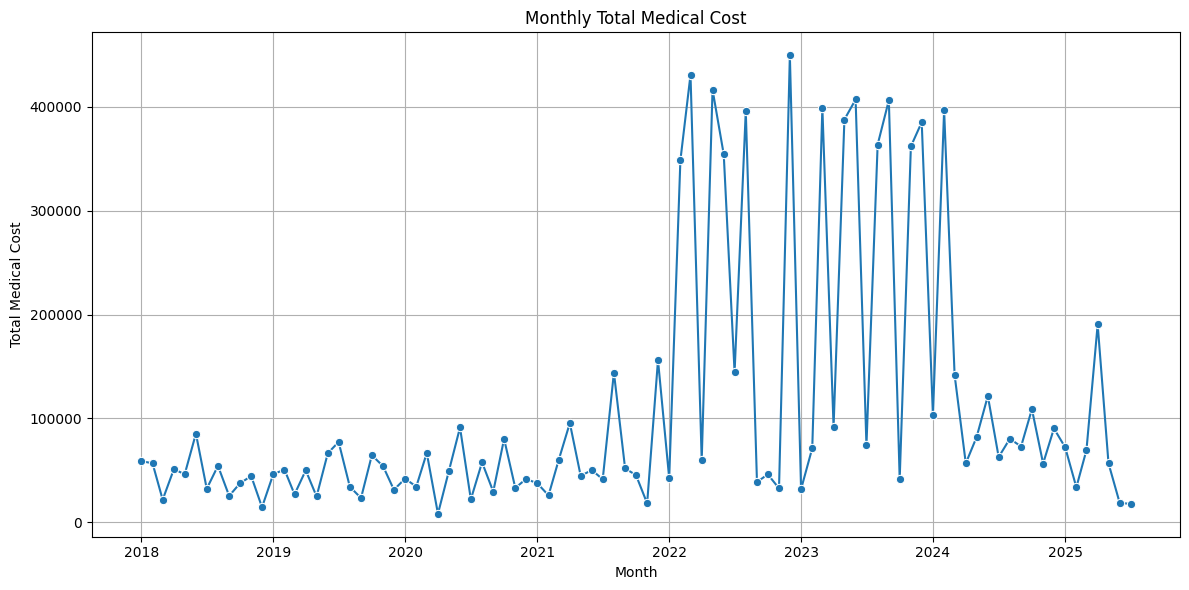

In [43]:
# Setting the variables:
X = "medtreat_yymm"
Y = "ika_out_req_amt"

df = df.filter(pl.col("birth_date").is_in([200401, 200612]))
print(df.n_unique("patient_id"))


df = df.with_columns(
    (pl.col(X).cast(pl.Utf8) + "01").str.strptime(pl.Date, "%Y%m%d").alias("month")
)

# Step 2: Aggregate monthly totals
monthly_sum = (
    df.group_by("month")
      .agg(pl.col("ika_out_req_amt").sum().alias("total_medical_cost"))
      .sort("month")
)

# Step 3: Convert to pandas for seaborn plotting
monthly_sum_pd = monthly_sum.to_pandas()

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sum_pd, x="month", y="total_medical_cost", marker="o")
plt.title("Monthly Total Medical Cost")
plt.xlabel("Month")
plt.ylabel("Total Medical Cost")
plt.grid(True)
plt.tight_layout()

plt.show()  # <-- keep this as the last line (no print, no semicolon)